In [30]:
%matplotlib inline


# Simple image blur by convolution with a Gaussian kernel


Blur an an image (:download:`../../../../data/elephant.png`) using a
Gaussian kernel.

Convolution is easy to perform with FFT: convolving two signals boils
down to multiplying their FFTs (and performing an inverse FFT).




In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

The original image
####################################################################



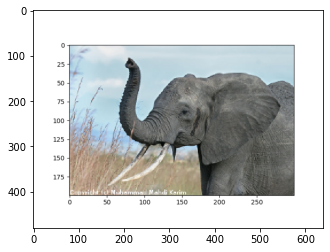

In [2]:
# read image
img = plt.imread('elephant.png')
plt.figure()
plt.imshow(img)

### Gaussian convolution kernel
####################################################################



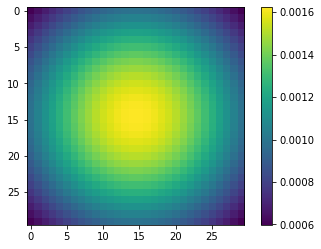

In [13]:
# First a 1-D  Gaussian
t = np.linspace(-0.5, 0.5, 30)
bump = np.exp(-t*t/(2*(0.5**2)))
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]
plt.imshow(kernel)
plt.colorbar()

### Moffat Distribution 2D

In [36]:
from astropy.modeling import models, fitting

m = models.Moffat2D(amplitude=2, gamma=15)
m w

In [66]:
arr = np.zeros((480,640))
for i in range(480):
    for j in range(640):
        arr[i][j] = img[i][j][-2]

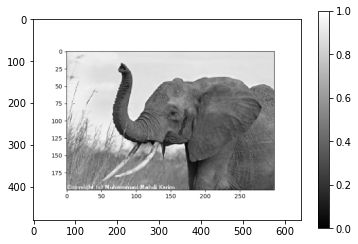

In [67]:
plt.imshow(arr,cmap='gray')
plt.colorbar()

In [46]:
s = np.linspace(0, 30, 100)
x,y = np.meshgrid(s,s)

In [47]:
fit_p = fitting.LevMarLSQFitter()
p = fit_p(m, x, y, z)

NameError: name 'z' is not defined

Implement convolution via FFT
####################################################################



In [10]:
# Padded fourier transform, with the same shape as the image
# We use :func:`scipy.signal.fftpack.fft2` to have a 2D FFT
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
# the 'newaxis' is to match to color direction
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.figure()
#plt.imshow(img2)
#plt.imshow(kernel)
img.shape[:2]

(480, 640)

<Figure size 432x288 with 0 Axes>

Further exercise (only if you are familiar with this stuff):

A "wrapped border" appears in the upper left and top edges of the
image. This is because the padding is not done correctly, and does
not take the kernel size into account (so the convolution "flows out
of bounds of the image").  Try to remove this artifact.



A function to do it: :func:`scipy.signal.fftconvolve`
####################################################################

 The above exercise was only for didactic reasons: there exists a
 function in scipy that will do this for us, and probably do a better
 job: :func:`scipy.signal.fftconvolve`



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


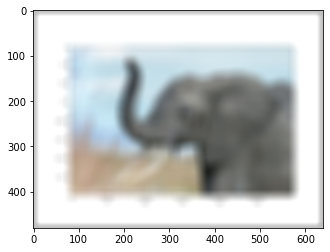

In [11]:
from scipy import signal
# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects)
img3 = signal.fftconvolve(img, kernel[:, :, np.newaxis], mode='same')
plt.figure()
plt.imshow(img3)

Note that we still have a decay to zero at the border of the image.
Using :func:`scipy.ndimage.gaussian_filter` would get rid of this
artifact



In [45]:
plt.show()


In [47]:
kernel_ft.shape

(480, 640)